# Package preparation

In [58]:
! pip install openpyxl

ERROR: Operation cancelled by user


In [59]:
! pip install matplotlib

In [60]:
! pip install seaborn

ERROR: Operation cancelled by user


In [61]:
! pip install plotly.express

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolu

In [62]:
! pip install --upgrade nbformat

ERROR: Operation cancelled by user


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data loading

In [65]:
path = '/content/drive/MyDrive/tianyi/drive-download-20231127T043040Z-001'

In [66]:
years = ['04','05','06','07','08','09','10','12','14','16']#Set file specific sections

In [67]:
#Store the table in the dictionary
table_room = {}
for i in range(len(years)):
    table_path=path+"/new_d"+years[i]+".xlsx"
    table_room.update({i:pd.read_excel(table_path)})

In [68]:
death_data=pd.read_csv(path+"/Death rates by leading causes of death.csv")#Death data

# Data preprocessing

##Add BMI values and classify them

Discussion: In general, the BMI index is a discrimination method that can measure whether a person is overweight through specific values, and it only requires a simple height and weight to obtain. And our group judged individuals with a BMI index less than 18.5 as thin, individuals with a BMI index between 18.5 and 24 as normal, and individuals with a BMI index greater than 24 as overweight.


In [69]:
for i in range(len(table_room)):
     BMI=table_room.get(i).loc[1:,"v6x"]/np.square(table_room.get(i).loc[1:,"v5x"]/100)
     BMI2=BMI.to_frame(name="BMI_num")
     new_table2=pd.merge(table_room.get(i),BMI2,left_index=True,right_index=True)
     table_room.update({i:new_table2})
     for j in range(1,len(BMI)+1):
          if BMI[j]<18.5 :
               BMI.loc[j]="thin"
          elif BMI.loc[j]<=24:
               BMI.loc[j]="normal"
          elif BMI.loc[j]>24:
               BMI.loc[j]="overweight"
     BMI=BMI.to_frame(name="BMI")
     new_table=pd.merge(table_room.get(i),BMI,left_index=True,right_index=True)
     if i == 0:
        new_table['v27x'] = new_table['v27x'].multiply(60)
     table_room.update({i:new_table})


##Changing gender data


Discussion: Changing gender 1 and 2 in the original data to more recognizable men and women will help us modify the following code.


In [70]:
sex_group=[]
for j in range(0,len(table_room)):
    sex_group=table_room.get(j)["v4"]
    for r in range(1,len(sex_group)+1):
            if sex_group[r]==1 :
                sex_group.loc[r]="男"
            else:
                sex_group.loc[r]="女"
    sex_group=sex_group.to_frame(name="sex")
    new_table=pd.merge(table_room.get(j),sex_group,left_index=True,right_index=True)


<ipython-input-70-457d9a9a53bc>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-457d9a9a53bc>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-457d9a9a53bc>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-457d9a9a53bc>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

##Copy the age column and rename it


Discussion: As age is a commonly used column in this table, for the convenience of future code writing, we will change the column name v70 corresponding to age to age_ Num.

In [71]:
age_num=[]
for v in range(0,len(table_room)):
    age_num=table_room.get(v)["v70"].to_frame(name="age_num")
    new_table3=pd.merge(table_room.get(v),age_num,left_index=True,right_index=True)
    table_room.update({v:new_table3})

##Classify existing age groups


Discussion: Due to the large age range and multiple classifications, we classify individuals under 44 as young, those over 44 but under 59 as middle-aged, and those over 59 but under 130 as elderly.

In [72]:
age_group=[]
for l in range(0,len(table_room)):
    age_group=table_room.get(l)["v70"]
    for s in range(1,len(age_group)+1):
            if age_group[s]<44 :
                age_group.loc[s]="青年"
            elif age_group[s]<59:
                age_group.loc[s]="中年"
            elif age_group[s]<130:
                age_group.loc[s]="老年"
    age_group=age_group.to_frame(name="age_group")
    new_table=pd.merge(table_room.get(l),age_group,left_index=True,right_index=True)


<ipython-input-72-281c127860e2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-281c127860e2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-281c127860e2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-281c127860e2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

##Select the 2016 table to view the modification results


Discussion: Select one of the tables we selected from 2004 to 2016 to observe our modified data graph, and the corresponding list has been changed from the original data to the format we expected.

In [73]:
table_room.get(9)

,v4,v5x,v6x,v10_r,v20,v21,v22,v25,v27x,v29,...,v36,v70,v71,v72,v73,v76,v77,BMI_num,BMI,age_num
1,女,166.00,49.00,3,1,60,0,7,600,5,...,1,青年,3,2,2,18,15,17.781971,thin,34
2,女,160.00,65.00,1,0,10,7,7,300,7,...,1,青年,3,2,2,18,13,25.390625,overweight,41
3,女,150.00,43.00,2,2,90,7,7,180,7,...,1,中年,2,2,1,2,11,19.111111,normal,53
4,女,168.00,52.50,2,0,10,1,7,480,2,...,1,青年,3,1,1,3,19,18.601190,normal,20
5,男,144.78,43.09,2,1,15,1,2,240,7,...,1,青年,2,1,2,18,6,20.556982,normal,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,女,168.00,77.11,1,5,180,0,7,60,5,...,1,青年,3,1,1,11,16,27.320720,overweight,35
3718,男,178.00,68.00,2,0,10,3,7,240,7,...,1,青年,4,1,2,18,19,21.461937,normal,23
3719,男,172.00,72.00,1,0,10,1,7,240,7,...,1,中年,4,2,1,18,19,24.337480,overweight,58
3720,女,154.00,46.00,2,0,10,0,7,600,3,...,1,中年,3,2,1,13,15,19.396188,normal,47


##Add Year Column


Discussion: Considering that it is not possible to explore the year to which a single column of data belongs after merging, to ensure the clarity of the data, add the year column in the table where the data is located.

In [74]:
for i in range(len(table_room)):
    table_room.update({i:table_room.get(i).assign(year="20"+years[i])})

##Merge Tables


Discussion: Merging all data helps us to unify the management and analysis of data in all tables.

In [75]:
df_merged = pd.merge(table_room.get(0), table_room.get(1),on=(table_room.get(0).columns).tolist(),how='outer')
for k in range(2,10):
    print(table_room.get(k))
    df_merged = pd.merge(df_merged, table_room.get(k),on=(table_room.get(0).columns).tolist(),how='outer')

<ipython-input-75-6ebcb8ca5078>:1: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



     v4     v5x   v6x  v10_r  v20  v21  v22  v25  v27x  v29  ...  v70  v71  \
1     女  160.00  50.0      1    0    0    0    4   600    3  ...   青年    3   
2     男  173.00  70.0      2    2   90    1    3   360    7  ...   青年    5   
3     女  161.25  68.0      2    0    0    0    7   240    7  ...   青年    3   
4     女  147.50  59.0      1    0    0    4    0   600    7  ...   青年    3   
5     男  160.00  66.0      1    0    0    5    3   360    4  ...   中年    2   
...  ..     ...   ...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
1785  男  178.00  55.0      3    3   30    5    7   270    4  ...   青年    3   
1786  男  185.00  78.0      1    0    0    0    2   360    5  ...   青年    4   
1787  男  166.00  59.0      2    0    0    0    4   240    7  ...   青年    5   
1788  女  168.00  57.0      3    0    0    0    4   240    7  ...   中年    3   
1789  女  165.00  70.0      1    7   30    7    7   300    7  ...   中年    5   

      v72  v73 v76  v77    BMI_num         BMI  age_num  year  

<ipython-input-75-6ebcb8ca5078>:4: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



     v4     v5x    v6x  v10_r  v20  v21  v22  v25  v27x  v29  ...  v70  v71  \
1     女  170.00  60.00      1    0    0    2    6   720    5  ...   青年    5   
2     女  152.00  43.64      2    0    0    1    7   360    2  ...   青年    5   
3     男  167.64  68.18      1    0    0    0    7   180    2  ...   青年    3   
4     男  165.00  70.00      2    0    0    6    7   600    6  ...   中年    5   
5     男  162.00  50.00      2    0    0    0    7    90    7  ...   中年    1   
...  ..     ...    ...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
1864  女  160.02  54.55      2    3  480    0    7   480    7  ...   青年    1   
1865  男  185.00  68.00      2    7  480    0    6   180    7  ...   青年    4   
1866  男  170.00  70.00      2    7  480    0    7   240    0  ...   青年    2   
1867  男  167.64  76.82      2    7  510    0    7   180    7  ...   老年    1   
1868  女  162.56  53.64      2    7  540    2    7   150    3  ...   中年    1   

      v72  v73 v76  v77    BMI_num         BMI  age

##Check and merge the overall table results

In [76]:
df_merged

,v4,v5x,v6x,v10_r,v20,v21,v22,v25,v27x,v29,...,v70,v71,v72,v73,v76,v77,BMI_num,BMI,age_num,year
0,男,165.0,65.00,1,0,0,0,7,120.0,1,...,中年,1,2,1,4,20,23.875115,normal,49,2004
1,男,175.0,55.00,3,0,0,0,3,840.0,8,...,青年,3,1,1,4,11,17.959184,thin,21,2004
2,男,178.0,77.00,1,0,0,0,7,60.0,2,...,青年,2,1,1,19,20,24.302487,overweight,27,2004
3,男,178.0,61.00,2,7,120,0,5,420.0,3,...,青年,3,1,1,4,20,19.252620,normal,19,2004
4,男,168.0,65.00,1,0,0,7,7,180.0,7,...,青年,3,1,1,8,13,23.030045,normal,26,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22652,女,168.0,77.11,1,5,180,0,7,60.0,5,...,青年,3,1,1,11,16,27.320720,overweight,35,2016
22653,男,178.0,68.00,2,0,10,3,7,240.0,7,...,青年,4,1,2,18,19,21.461937,normal,23,2016
22654,男,172.0,72.00,1,0,10,1,7,240.0,7,...,中年,4,2,1,18,19,24.337480,overweight,58,2016
22655,女,154.0,46.00,2,0,10,0,7,600.0,3,...,中年,3,2,1,13,15,19.396188,normal,47,2016


# Preliminary data analysis

##Sunburst


Discussion: The Sunburst chart consists of columns for gender, age, and year of personnel in the table, and displays the mean BMI of each group of personnel. In the figure below, we can see that the majority of people who make up the data source are young and middle-aged. Regardless of gender, the BMI index of young people is significantly lower than that of middle-aged and elderly people. The BMI index of women in all age groups is lower than that of men.

Group according to gender, age, and year, and analyze the BMI situation of different groups.

In [77]:
fig = px.sunburst(df_merged, path=['v4', 'v70','year'],
    color='BMI_num')

In [78]:
fig.show()

##Pivot table


Discussion: In the pivot table, we subdivide males and females into youth, middle age, and elderly, and explore the corresponding BMI index for the survey population from 2004 to 2016 through two separate classifications.


In [79]:
pd.pivot_table(df_merged,values='BMI_num',index=['v4','v70'],columns='year',margins=True,margins_name="Avg")

year          2004       2005       2006       2007       2008       2009  \
v4  v70                                                                     
女   中年   23.295093  22.941620  23.429756  22.807580  23.032605  23.046711   
    老年   23.953188  23.053333  24.699937  23.155980  23.246168  22.739510   
    青年   21.503073  21.016167  21.232207  21.124249  20.860772  21.052406   
男   中年   23.780113  24.152005  24.590044  23.937014  24.352917  24.178808   
    老年   24.372157  23.502714  23.427358  24.012809  24.000786  23.999503   
    青年   22.638400  22.708990  22.519535  22.813203  22.724265  22.632441   
Avg      22.593810  22.337894  22.669716  22.451729  22.523329  22.548877   

year          2010       2012       2014       2016        Avg  
v4  v70                                                         
女   中年   23.133066  22.814050  22.620108  22.607522  22.898609  
    老年   23.409541  22.995486  22.667157  22.709989  22.974266  
    青年   20.971277  20.744381  21.018077  21.000251  21.064139  
男   中年   24.076924  24.135487  24.338531  24.103000  24.169501  
    老年   23.170458  23.728006  23.583266  23.620555  23.693803  
    青年   22.449809  22.425661  22.482921  22.566257  22.597127  
Avg      22.536435  22.438734  22.499135  22.540504  22.515725

##Scatter table


Discussion: As shown in the Scatter table chart, taking a 10 minute walk daily is something that most people of all ages can achieve. For individuals with a high BMI index, the proportion of walking for at least 10 minutes per day is significantly smaller than other populations.

Display daily walking habits of people with different BMI indices in different age groups.

In [80]:
fig2=px.scatter(df_merged,x='age_num',y='BMI_num',color='v25')
fig2.show()

Display the employment situation of people with different BMI indices in different age groups.

In [81]:
fig3=px.scatter(df_merged,x='age_num',y='BMI_num',color='v73')
fig3.show()

Display BMI distribution across age groups in different years.

In [82]:
count_df = df_merged.groupby(['year','age_num', 'BMI']).size().reset_index(name='count')
count_df

,year,age_num,BMI,count
0,2004,18,normal,41
1,2004,18,overweight,2
2,2004,18,thin,28
3,2004,19,normal,25
4,2004,19,overweight,8
...,...,...,...,...
1355,2016,63,overweight,36
1356,2016,63,thin,6
1357,2016,64,normal,91
1358,2016,64,overweight,45


In [83]:
fig3=px.scatter(count_df,x='year',y='age_num',size='count',color='BMI')
fig3.show()

# Advanced processing

##Convert some data by year to percentage.


Discussion: Converting numbers in the original data into percentages that meet a certain condition not only preserves the changing characteristics of the data, but also allows data from different columns to be compared together, which is helpful for data exploration.

In [84]:
Activelyexercising = []
Eachexercisehasintensity = []
Activelyandreasonablyexercise = []
Mildexercise = []
onchairs = []
for i in range(len(table_room)):
    v20_values = table_room[i]['v20'].values
    v21_values=table_room[i]['v21'].values
    v22_values=table_room[i]['v22'].values
    v25_values=table_room[i]['v25'].values
    v27x_values=table_room[i]['v27x'].values
    percentage_4 = np.mean(v20_values)/(7) * 100
    percentage_5 = np.mean(v21_values > 30) * 100
    percentage_6 = np.mean(v22_values == 7) * 100
    percentage_7 = np.mean(v25_values==7) * 100
    percentage_8 = np.mean(v27x_values)/(24*60) * 100
    Activelyexercising.append(percentage_4)
    Eachexercisehasintensity.append(percentage_5)
    Activelyandreasonablyexercise.append(percentage_6)
    Mildexercise.append(percentage_7)
    onchairs.append(percentage_8)

In [85]:
overweight=[]
overweight_self=[]
fruit_week=[]
vegetables_week=[]
smoked_now=[]
marital_status=[]
working_status=[]
sport_days=[]

for y in range(len(table_room)):
    overweight.append(round(table_room.get(y)["BMI"].value_counts(normalize=True)["overweight"],2))
    overweight_self.append(round(table_room.get(y)["v10_r"].value_counts(normalize=True)[1],2))
    fruit_week.append(round(table_room.get(y)["v29"].mean()/7,2))
    vegetables_week.append(round(table_room.get(y)["v31"].mean()/7,2))
    smoked_now.append(round(table_room.get(y)["v34"].value_counts(normalize=True)[2],2))
    marital_status.append(round(1-table_room.get(y)["v72"].value_counts(normalize=True)[1],2))
    working_status.append(round(table_room.get(y)["v73"].value_counts(normalize=True)[2],2))
    sport_days.append(round(table_room.get(y)["v20"].mean(),2))
print(overweight)
print(overweight_self)
print(fruit_week)
print(vegetables_week)
print(smoked_now)
print(marital_status)
print(working_status)
print(sport_days)

[0.28, 0.28, 0.32, 0.29, 0.29, 0.3, 0.3, 0.28, 0.29, 0.29]
[0.42, 0.44, 0.42, 0.43, 0.43, 0.44, 0.45, 0.44, 0.45, 0.43]
[0.79, 0.7, 0.78, 0.78, 0.77, 0.8, 0.8, 0.79, 0.8, 0.78]
[0.94, 0.91, 0.93, 0.92, 0.93, 0.93, 0.93, 0.93, 0.94, 0.93]
[0.15, 0.15, 0.14, 0.14, 0.13, 0.12, 0.11, 0.09, 0.09, 0.09]
[0.68, 0.69, 0.67, 0.68, 0.7, 0.68, 0.71, 0.74, 0.73, 0.68]
[0.37, 0.38, 0.4, 0.42, 0.41, 0.44, 0.44, 0.42, 0.42, 0.4]
[1.04, 0.99, 0.96, 0.93, 0.99, 1.0, 1.04, 1.12, 1.05, 1.25]


In [86]:
Feelingheavy = []
overweight1 = []
Clearselfawareness = []
for i in range(len(table_room)):
    v10_r_values = table_room[i]['v10_r'].values
    BMI_values=table_room[i]['BMI'].values
    percentage_1 = np.mean(v10_r_values == 1) * 100
    percentage_2 = np.mean(BMI_values == "overweight") * 100
    percentage_3 = np.mean((v10_r_values == 1) & (BMI_values == "overweight")) * 100
    Feelingheavy.append(percentage_1)
    overweight1.append(percentage_2)
    Clearselfawareness.append(percentage_3)

##Chart analysis

Discussion: After converting the data in each column into percentages that can be compared together, explore the correlation coefficients between them. We can find that self-awareness about obesity is usually positively correlated with smoking frequency and whether one works. In other words, the more frequent smoking and working individuals are, the more they tend to feel overweight.

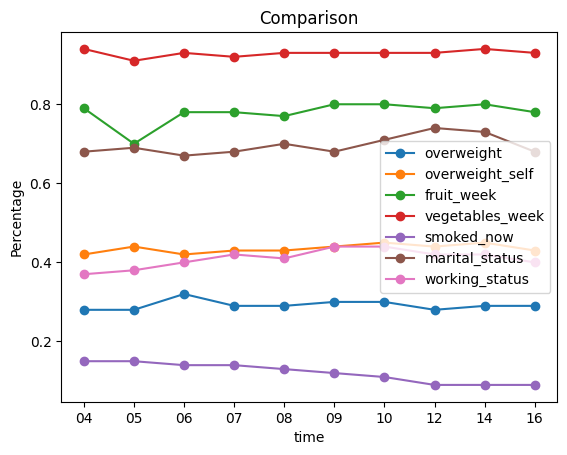

In [87]:
plt.plot(range(len(table_room)), overweight, marker='o', label='overweight')
plt.plot(range(len(table_room)), overweight_self, marker='o', label='overweight_self')
plt.plot(range(len(table_room)), fruit_week, marker='o', label='fruit_week')
plt.plot(range(len(table_room)), vegetables_week, marker='o', label='vegetables_week')
plt.plot(range(len(table_room)), smoked_now, marker='o', label='smoked_now')
plt.plot(range(len(table_room)), marital_status, marker='o', label='marital_status')
plt.plot(range(len(table_room)), working_status, marker='o', label='working_status')
plt.xlabel('time')
plt.ylabel('Percentage')
plt.title('Comparison')
plt.xticks(range(0, 10), ['04','05','06','07','08','09','10','12','14','16'])
plt.legend()
plt.show()

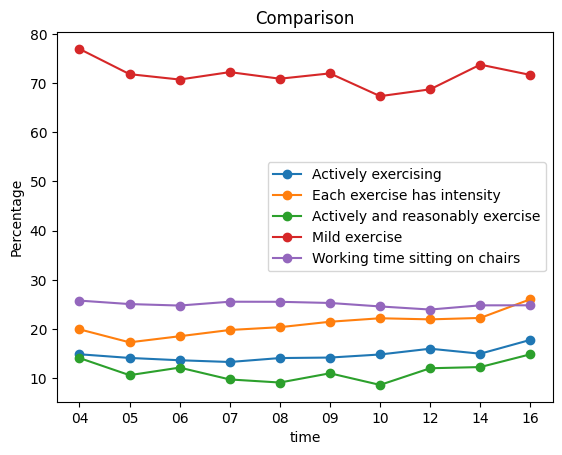

In [88]:
plt.plot(range(len(table_room)), Activelyexercising, marker='o', label='Actively exercising')
plt.plot(range(len(table_room)), Eachexercisehasintensity, marker='o', label='Each exercise has intensity')
plt.plot(range(len(table_room)), Activelyandreasonablyexercise, marker='o', label='Actively and reasonably exercise')
plt.plot(range(len(table_room)), Mildexercise, marker='o', label='Mild exercise')
plt.plot(range(len(table_room)), onchairs, marker='o', label='Working time sitting on chairs')
plt.xlabel('time')
plt.ylabel('Percentage')
plt.title('Comparison')
plt.xticks(range(0, 10), ["04", "05", "06", "07", "08", "09", "10", "12", "14", "16"])
plt.legend()
plt.show()

Correlation coefficient

<Axes: >

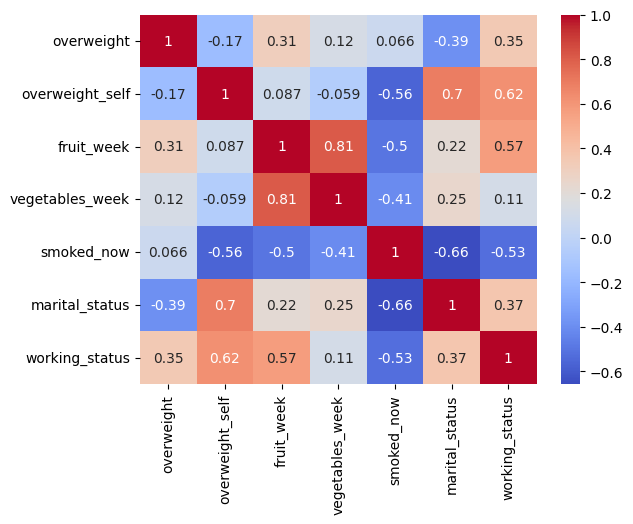

In [89]:
data={"overweight":overweight,"overweight_self":overweight_self,"fruit_week":fruit_week,"vegetables_week":vegetables_week,"smoked_now":smoked_now,
"marital_status":marital_status,"working_status":working_status}
data=pd.DataFrame(data)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: >

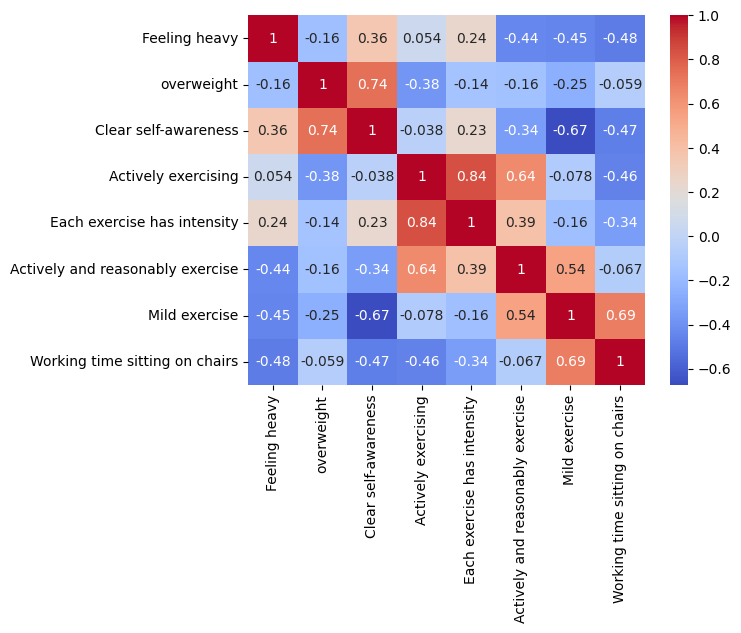

In [90]:
data={"Feeling heavy":Feelingheavy,"overweight":overweight1,"Clear self-awareness":Clearselfawareness,"Actively exercising":Activelyexercising,"Each exercise has intensity":Eachexercisehasintensity,
"Actively and reasonably exercise":Activelyandreasonablyexercise,"Mild exercise":Mildexercise,"Working time sitting on chairs":onchairs}
data=pd.DataFrame(data)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

##Strong relationship comparison

Discussion: Explore the relationship between perceived obesity and actual obesity. We found that the majority of people who believe they are obese are not actually obese, while only a small percentage of obese people are aware that they are obese. This indicates that most people are in anxiety about their body shape, which is often unnecessary.

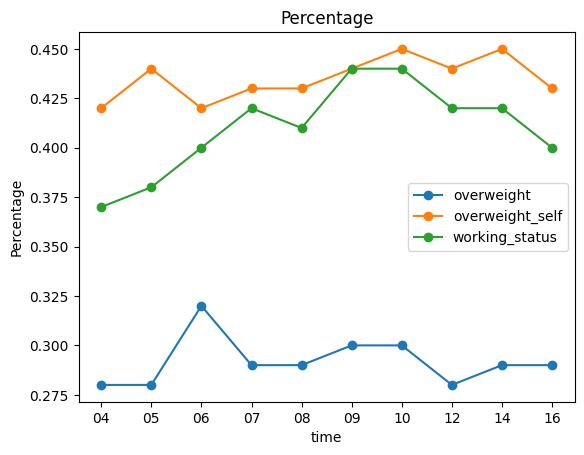

In [91]:
plt.plot(range(len(table_room)), overweight, marker='o', label='overweight')
plt.plot(range(len(table_room)), overweight_self, marker='o', label='overweight_self')
plt.plot(range(len(table_room)), working_status, marker='o', label='working_status')
plt.xlabel('time')
plt.ylabel('Percentage')
plt.title('Percentage')
plt.xticks(range(0, 10), ['04','05','06','07','08','09','10','12','14','16'])
plt.legend()
plt.show()

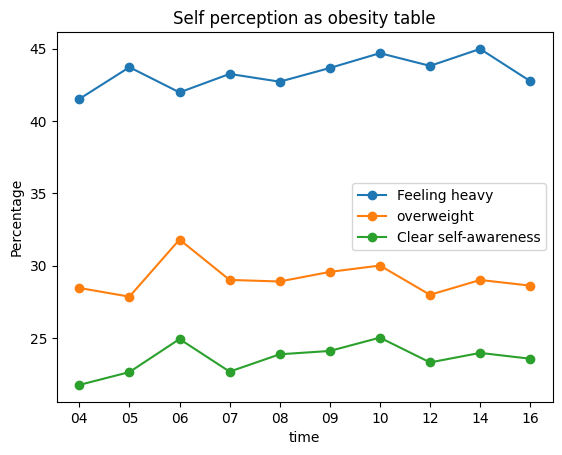

In [92]:
plt.plot(range(len(table_room)), Feelingheavy, marker='o', label='Feeling heavy')
plt.plot(range(len(table_room)), overweight1, marker='o', label='overweight')
plt.plot(range(len(table_room)), Clearselfawareness, marker='o', label='Clear self-awareness')
plt.xlabel('time')
plt.ylabel('Percentage')
plt.title('Self perception as obesity table')
plt.xticks(range(0, 10), ["04", "05", "06", "07", "08", "09", "10", "12", "14", "16"])
plt.legend()
plt.show()

# Death data analysis

##Table transformation

The original death data rows and columns do not meet the requirements of our analysis, so they need to be transposed and renamed.

In [93]:
death_data=death_data.T
death_data.columns=death_data.iloc[0]
death_data = death_data.drop(death_data.index[0])

Add BMI index

In [94]:
death_data["overweight"]=overweight1

We have preliminarily found that the proportion of overweight individuals is similar every year.

In [95]:
death_data

cause,Malignant tumors,Pneumonia,Heart disease,Cerebrovascular disease,External causes of disease and death,"Nephritis, nephrotic syndrome, and nephrosis",Cognitive impairment,Septicemia,Chronic Lower Respiratory Disease,diabetes,others,total,overweight
2004,173.8,54.2,86.5,50.4,33.1,17.4,4.1,9.1,31.3,10.7,79.7,550.2,28.460418
2005,180.7,63.0,86.1,50.4,31.6,18.5,4.2,10.3,33.2,8.8,81.0,567.8,27.858744
2006,176.4,61.3,81.9,48.2,28.6,18.8,4.2,9.9,28.1,7.5,81.0,545.6,31.805478
2007,178.1,72.0,92.1,50.8,26.8,19.5,4.6,10.7,30.3,7.3,85.7,577.8,29.016658
2008,179.0,78.8,97.4,53.0,25.4,20.4,7.1,11.5,30.2,7.9,86.1,596.9,28.907923
2009,184.1,76.2,92.0,49.4,27.8,20.8,9.1,10.6,27.4,7.1,84.3,588.7,29.570991
2010,186.2,82.8,94.5,48.7,26.5,21.3,10.9,11.8,29.8,7.4,88.1,607.9,30.010834
2012,186.5,97.3,87.9,45.8,23.1,22.8,12.6,11.7,27.7,5.6,89.7,610.8,27.987254
2014,190.9,103.8,88.6,46.1,25.4,23.3,15.4,12.2,24.1,5.4,97.1,632.3,29.012346
2016,193.7,113.0,84.5,43.9,24.7,23.3,18.7,13.2,22.3,6.8,91.9,636.0,28.621338


##data standardization

In order to accommodate significant differences in results due to differences in units during later comparison, we standardized the results beforehand.

In [96]:
ss=StandardScaler()
death_data_SS=ss.fit_transform(death_data)

<ipython-input-97-1b7a8388f538>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

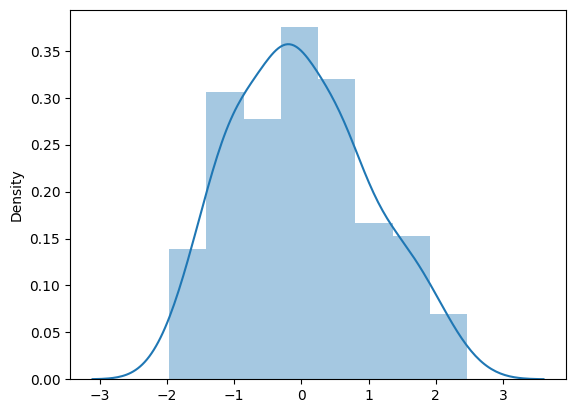

In [97]:
sns.distplot(pd.DataFrame(death_data_SS),label='Standard Scaling')

In [98]:
pd.DataFrame(death_data_SS)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.494422,-1.423524,-0.584028,0.665281,1.971148,-1.623595,-1.008938,-1.746076,0.915820,2.254283,-1.309026,-1.382183,-0.611118
1,-0.366248,-0.942456,-0.672183,0.665281,1.461368,-1.067223,-0.988718,-0.698430,1.524232,0.936394,-1.057290,-0.791736,-1.164222
2,-1.069313,-1.035390,-1.597812,-0.180741,0.441809,-0.915485,-0.988718,-1.047645,-0.108874,0.034681,-1.057290,-1.536504,2.463919
3,-0.791357,-0.450455,0.650144,0.819104,-0.169927,-0.561430,-0.907842,-0.349215,0.595603,-0.104044,-0.147169,-0.456255,-0.099779
4,-0.644204,-0.078720,1.818200,1.665126,-0.645721,-0.106217,-0.402362,0.349215,0.563582,0.312131,-0.069711,0.184515,-0.199736
5,0.189664,-0.220854,0.628105,0.280726,0.169927,0.096101,0.002022,-0.436519,-0.333026,-0.242769,-0.418269,-0.090580,0.409807
6,0.533021,0.139947,1.179075,0.011537,-0.271882,0.348997,0.365967,0.611127,0.435495,-0.034681,0.317574,0.553544,0.814145
7,0.582072,0.932616,-0.275485,-1.103675,-1.427383,1.107686,0.709694,0.523823,-0.236961,-1.283207,0.627403,0.650834,-1.046086
8,1.301488,1.287950,-0.121213,-0.988308,-0.645721,1.360583,1.275831,0.960342,-1.389741,-1.421932,2.060360,1.372119,-0.103743
9,1.759298,1.790885,-1.024803,-1.834330,-0.883618,1.360583,1.943064,1.833380,-1.966132,-0.450857,1.053417,1.496247,-0.463187


##Correlation chart

We can see that the correlation between column 12 (overweight) and other columns (causes of death per 10000 people) is very weak, confirming our previous findings that the overweight rate remains largely unchanged and has little or no correlation with different causes of death.

<Axes: >

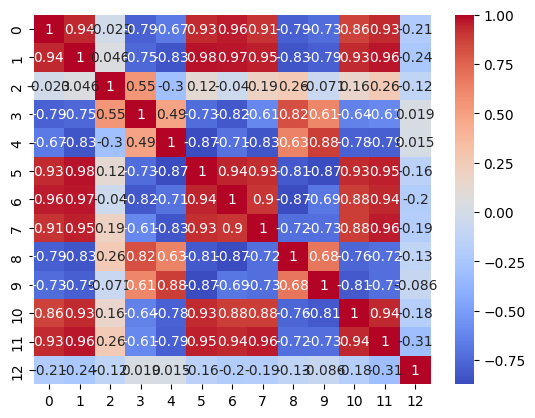

In [99]:
sns.heatmap(pd.DataFrame(death_data_SS).corr(), annot=True, cmap='coolwarm')

##Analyze the distribution of BMI population in different years

Put the mean BMI of different years in the list.

In [100]:
normal_t=[]
overweight_t=[]
thin_t=[]

for q in range(0,len(table_room)):
    normal_t.append(table_room.get(q)["BMI"].value_counts(normalize=True)["normal"])
    overweight_t.append(table_room.get(q)["BMI"].value_counts(normalize=True)["overweight"])
    thin_t.append(table_room.get(q)["BMI"].value_counts(normalize=True)["thin"])

From the graph, it can be seen that the proportion of BMI in different years has remained relatively stable.

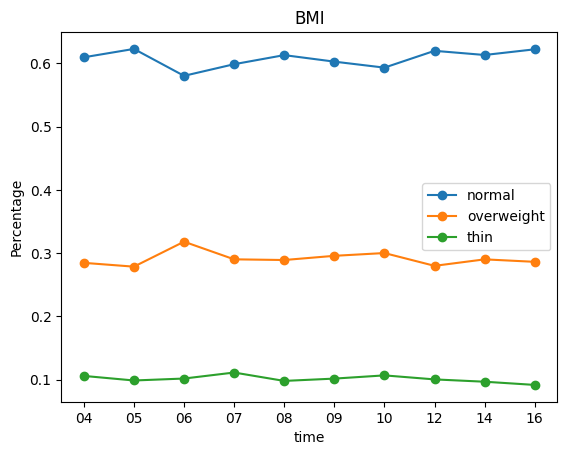

In [101]:
plt.plot(range(len(table_room)), normal_t, marker='o', label='normal')
plt.plot(range(len(table_room)), overweight_t, marker='o', label='overweight')
plt.plot(range(len(table_room)), thin_t, marker='o', label='thin')
plt.xlabel('time')
plt.ylabel('Percentage')
plt.title('BMI')
plt.xticks(range(0, 10), ["04", "05", "06", "07", "08", "09", "10", "12", "14", "16"])
plt.legend()
plt.show()

##Calculate the mean of numerical columns for different groups based on year and age

In [191]:
AVG_table=pd.DataFrame(df_merged.groupby(["year","v70"]).mean())
AVG_total_table=pd.DataFrame(df_merged.groupby(["year"]).mean())

<ipython-input-191-b98611db21d2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-191-b98611db21d2>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [193]:
AVG1=[]
AVG2=[]
AVG3=[]
AVG_total_BMI=[]

for w in years:
  col_name="20"+w
  AVG1.append(AVG_table.loc[col_name,"青年"]["BMI_num"])
  AVG2.append(AVG_table.loc[col_name,"中年"]["BMI_num"])
  AVG3.append(AVG_table.loc[col_name,"老年"]["BMI_num"])
  AVG_total_BMI.append(AVG_total_table.loc[col_name]["BMI_num"])
print(AVG_total_BMI)

[22.59380988332052, 22.337894090413716, 22.66971597957021, 22.451729451091346, 22.523328604412352, 22.54887694367078, 22.53643509551188, 22.438734402236562, 22.499134764822692, 22.5405040957272]


Analyzing the evaluation of BMI levels among different age groups, it was found that the BMI levels of different populations have maintained a relatively stable state in the 10-year record, and the average BMI level of young people has always been lower than that of elderly and middle-aged people.

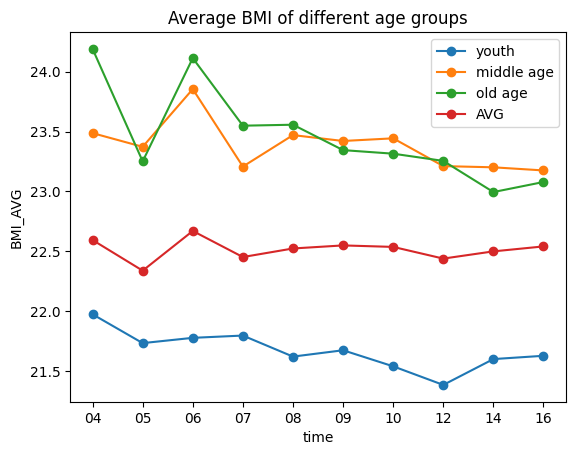

In [194]:
plt.plot(range(len(table_room)), AVG1, marker='o', label='youth')
plt.plot(range(len(table_room)), AVG2, marker='o', label='middle age')
plt.plot(range(len(table_room)), AVG3, marker='o', label='old age')
plt.plot(range(len(table_room)), AVG_total_BMI, marker='o', label='AVG')
plt.xlabel('time')
plt.ylabel('BMI_AVG')
plt.title('Average BMI of different age groups')
plt.xticks(range(0, 10), ['04','05','06','07','08','09','10','12','14','16'])
plt.legend()
plt.show()

Add new columns to the original death data table.

In [195]:
death_data["MIDAGE_BMI"]=AVG2
death_data["OLDAGE_BMI"]=AVG3
death_data["AVG_BMI"]=AVG_total_BMI

In [207]:
death_data

cause,Malignant tumors,Pneumonia,Heart disease,Cerebrovascular disease,External causes of disease and death,"Nephritis, nephrotic syndrome, and nephrosis",Cognitive impairment,Septicemia,Chronic Lower Respiratory Disease,diabetes,others,total,overweight,MIDAGE_BMI,OLDAGE_BMI,AVG_BMI
2004,173.8,54.2,86.5,50.4,33.1,17.4,4.1,9.1,31.3,10.7,79.7,550.2,28.460418,23.487366,24.191077,22.593810
2005,180.7,63.0,86.1,50.4,31.6,18.5,4.2,10.3,33.2,8.8,81.0,567.8,27.858744,23.372981,23.251589,22.337894
2006,176.4,61.3,81.9,48.2,28.6,18.8,4.2,9.9,28.1,7.5,81.0,545.6,31.805478,23.855380,24.114146,22.669716
2007,178.1,72.0,92.1,50.8,26.8,19.5,4.6,10.7,30.3,7.3,85.7,577.8,29.016658,23.207824,23.549487,22.451729
2008,179.0,78.8,97.4,53.0,25.4,20.4,7.1,11.5,30.2,7.9,86.1,596.9,28.907923,23.470860,23.557598,22.523329
2009,184.1,76.2,92.0,49.4,27.8,20.8,9.1,10.6,27.4,7.1,84.3,588.7,29.570991,23.421664,23.345276,22.548877
2010,186.2,82.8,94.5,48.7,26.5,21.3,10.9,11.8,29.8,7.4,88.1,607.9,30.010834,23.443880,23.315509,22.536435
2012,186.5,97.3,87.9,45.8,23.1,22.8,12.6,11.7,27.7,5.6,89.7,610.8,27.987254,23.211666,23.255175,22.438734
2014,190.9,103.8,88.6,46.1,25.4,23.3,15.4,12.2,24.1,5.4,97.1,632.3,29.012346,23.201644,22.994807,22.499135
2016,193.7,113.0,84.5,43.9,24.7,23.3,18.7,13.2,22.3,6.8,91.9,636.0,28.621338,23.175502,23.078780,22.540504


In [209]:
death_BMI_SS=ss.fit_transform(death_data)

##Put standardized data into CORR tables.

We found that the older the age, the greater the correlation between BMI and various mortality factors, and most of them have a negative correlation.

<Axes: >

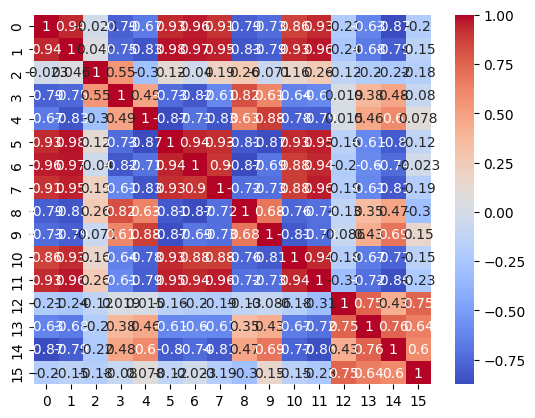

In [211]:
sns.heatmap(pd.DataFrame(death_BMI_SS).corr(), annot=True, cmap='coolwarm')